# Credit Risk Ensemble Techniques

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
%matplotlib inline

In [7]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

# Read the CSV and Perform Basic Data Cleaning

In [8]:
# Load the data
file_path = Path('Resources/lending_data.csv')
df = pd.read_csv(file_path)

df.head()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,own,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,own,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,rent,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,own,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,mortgage,53000,0.433962,5,1,23000,low_risk


# Split the Data into Training and Testing

In [9]:
# Create our features

df = pd.get_dummies(df, columns=["homeowner"])

X = df.drop(columns="loan_status")

# Create our target
y = df["loan_status"]


In [10]:
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status,homeowner_mortgage,homeowner_own,homeowner_rent
0,10700.0,7.672,52800,0.431818,5,1,22800,low_risk,0,1,0
1,8400.0,6.692,43600,0.311927,3,0,13600,low_risk,0,1,0
2,9000.0,6.963,46100,0.349241,3,0,16100,low_risk,0,0,1
3,10700.0,7.664,52700,0.430740,5,1,22700,low_risk,0,1,0
4,10800.0,7.698,53000,0.433962,5,1,23000,low_risk,1,0,0


In [11]:
X.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,homeowner_mortgage,homeowner_own,homeowner_rent
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.497472,0.398911,0.103616
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.499997,0.489678,0.304764
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000,0.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000,0.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,1.000000,1.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000,1.000000,1.000000


In [12]:
# Check the balance of our target values
y.value_counts()

low_risk     75036
high_risk     2500
Name: loan_status, dtype: int64

In [13]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(58152, 10)

# Ensemble Learners

In this section, you will compare two ensemble algorithms to determine which algorithm results in the best performance. You will train a Balanced Random Forest Classifier and an Easy Ensemble classifier . For each algorithm, be sure to complete the folliowing steps:

1. Train the model using the training data. 
2. Calculate the balanced accuracy score from sklearn.metrics.
3. Print the confusion matrix from sklearn.metrics.
4. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.
5. For the Balanced Random Forest Classifier onely, print the feature importance sorted in descending order (most important feature to least important) along with the feature score

Note: Use a random state of 1 for each algorithm to ensure consistency between tests

### Balanced Random Forest Classifier

In [14]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf.fit(X_train, y_train)

BalancedRandomForestClassifier(random_state=1)

In [15]:
# Calculated the imbalanced accuracy score
y_pred_lr = brf.predict(X_test)

print(classification_report_imbalanced(y_test, y_pred_lr)) 

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.81      1.00      0.99      0.89      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       0.99      0.99      1.00      0.99      0.99      0.99     19384



In [16]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_lr)

array([[  622,     3],
       [  147, 18612]], dtype=int64)

In [17]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_lr))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.81      1.00      0.99      0.89      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       0.99      0.99      1.00      0.99      0.99      0.99     19384



In [18]:
# List the features sorted in descending order by feature importance
importances = brf.feature_importances_
sorted(zip(brf.feature_importances_, X.columns), reverse=True)

[(0.22759633831687995, 'borrower_income'),
 (0.1965574723230606, 'interest_rate'),
 (0.17417807060091195, 'debt_to_income'),
 (0.14944360428565667, 'total_debt'),
 (0.14229163194622926, 'loan_size'),
 (0.07859627283289125, 'num_of_accounts'),
 (0.02885770833789564, 'derogatory_marks'),
 (0.001219411955649641, 'homeowner_own'),
 (0.0008974701883394341, 'homeowner_mortgage'),
 (0.0003620192124855904, 'homeowner_rent')]

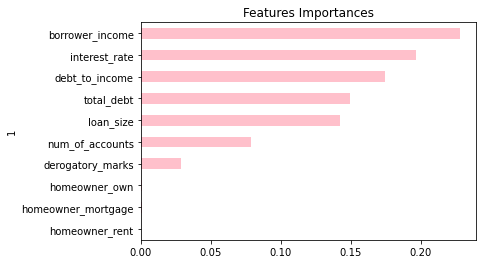

In [19]:
features_df = pd.DataFrame(sorted(zip(brf.feature_importances_, X.columns), reverse=True))
features_df.set_index(features_df[1], inplace=True)
features_df.drop(columns=1, inplace=True)
features_df.rename(columns={0: 'Feature Importances'}, inplace=True)
features_sorted = features_df.sort_values(by='Feature Importances')
features_sorted.plot(kind='barh', color='pink', title= 'Features Importances', legend=False)

### Easy Ensemble Classifier

In [20]:
# Train the EasyEnsembleClassifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100,
                         random_state=1)

In [21]:
# Fit to the model
from sklearn.metrics import accuracy_score

abc = abc.fit(X_train, y_train)

# Calculated the balanced accuracy score
predictions = abc.predict(X_test)

abc_score = accuracy_score(y_test, predictions) 

In [23]:
# Display the confusion matrix
confusion_matrix(y_test, predictions)

array([[  622,     3],
       [  104, 18655]], dtype=int64)

In [25]:
# Print the imbalanced classification report

print(classification_report_imbalanced(y_test, predictions))

                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.86      1.00      0.99      0.92      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       1.00      0.99      1.00      0.99      0.99      0.99     19384



In [26]:
#top features
importances = abc.feature_importances_
sorted(zip(abc.feature_importances_, X.columns), reverse=True)

[(0.98, 'interest_rate'),
 (0.01, 'total_debt'),
 (0.01, 'homeowner_mortgage'),
 (0.0, 'num_of_accounts'),
 (0.0, 'loan_size'),
 (0.0, 'homeowner_rent'),
 (0.0, 'homeowner_own'),
 (0.0, 'derogatory_marks'),
 (0.0, 'debt_to_income'),
 (0.0, 'borrower_income')]

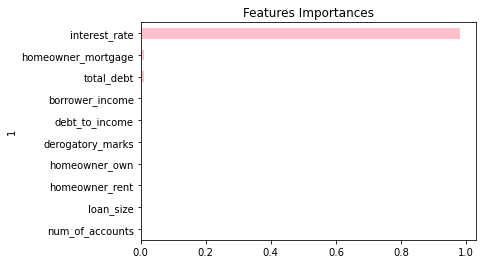

In [28]:
#plot features

features_abc = pd.DataFrame(sorted(zip(abc.feature_importances_, X.columns), reverse=True))
features_abc.set_index(features_abc[1], inplace=True)
features_abc.drop(columns=1, inplace=True)
features_abc.rename(columns={0: 'Feature Importances'}, inplace=True)
features_sorted1 = features_abc.sort_values(by='Feature Importances')
features_sorted1.plot(kind='barh', color='pink', title= 'Features Importances', legend=False)